In [2]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
 
df=pd.read_csv(url,sep=',')
 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
nominal=df[['Mjob','Fjob','reason','guardian']]
nominal=nominal.replace('at_home','home')
nominal=(nominal.astype('category'))

In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
nominal['guardian']=lb.fit_transform(nominal['guardian'])

In [5]:
nominal['Mjob']=lb.fit_transform(nominal['Mjob'])
nominal['Fjob']=lb.fit_transform(nominal['Fjob'])
nominal['reason']=lb.fit_transform(nominal['reason'])

In [6]:
nominal.head()

,Mjob,Fjob,reason,guardian
0,1,4,0,1
1,1,2,0,0
2,1,2,2,1
3,0,3,1,1
4,2,2,1,0


In [7]:
nom1=np.array(nominal)
nom1.reshape(-1,2)
nom2=np.array(nominal)
nom2.reshape(-1,2)


array([[1, 4],
       [0, 1],
       [1, 2],
       ...,
       [0, 1],
       [2, 1],
       [0, 0]])

In [8]:
from scipy.spatial import distance
dist_matrix=distance.cdist(nom1,nom2)

(395, 395)

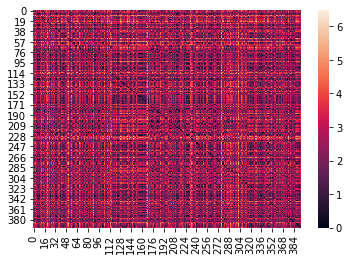

In [9]:
sbs.heatmap(dist_matrix)
dist_matrix.shape

In [10]:
numeric=df[['age','Medu','Fedu','traveltime','studytime','failures']]
numeric.head()


,age,Medu,Fedu,traveltime,studytime,failures
0,18,4,4,2,2,0
1,17,1,1,1,2,0
2,15,1,1,1,2,3
3,15,4,2,1,3,0
4,16,3,3,1,2,0


In [11]:

num1=np.array(numeric[['age','failures']])
num1.reshape(-1,2)
num1.shape

(395, 2)

In [12]:
num2=np.array(numeric[['Fedu','Medu']])
num2.reshape(-1,2)
num2.shape

(395, 2)

[[14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [13.60147051 16.03121954 16.03121954 ... 16.03121954 15.29705854
  16.03121954]
 [11.04536102 14.14213562 14.14213562 ... 14.14213562 13.
  14.14213562]
 ...
 [17.02938637 20.09975124 20.09975124 ... 20.09975124 19.
  20.09975124]
 [14.56021978 17.02938637 17.02938637 ... 17.02938637 16.2788206
  17.02938637]
 [15.5241747  18.02775638 18.02775638 ... 18.02775638 17.2626765
  18.02775638]]


<AxesSubplot:>

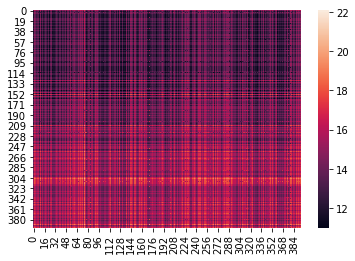

In [13]:
from scipy.spatial import distance
dist_matrix=distance.cdist(num1,num2)
print(dist_matrix)
dist_matrix.shape
sbs.heatmap(dist_matrix)